# 3. Plotting for Exploratory data analysis (EDA)

### by Shekhar Pandey

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



<p><b>EDA</b>, Exploratory Data Analysis is a task of analysing data using tools like visualization. Since at start we dont know
much about data, so EDA helps us to understand the data.</p>

<p><b>Data-point</b>: A row in a dataset is called as datapoint or an observation</p>
<p><b>Data-set</b>: A Dataset is a whole table i.e Data collected </p>
<p>Feature/Variable/Independent variable are the columns in datasets based on which learning is done 
and they are Inout for which prediction is to be done </p>
<p> Class label / Dependent Variable is the one which we want to predict for given set of features</p>

In [ ]:
## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load iris.csv into a pandas dataFrame.
iris = pd.read_csv('iris.csv')

In [5]:
# (Q) how many data-points and features?
print(iris.shape)

(150, 5)


<p> Data set has 150 data points and 5 features</p>


In [6]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [7]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

# Approach 1
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [8]:
# Approach 2 
iris.groupby(['species']).size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

<p>Iris dataset is a balanced dataset as the number of data points for every class is same</p>

# (3.2) 2-D Scatter Plot

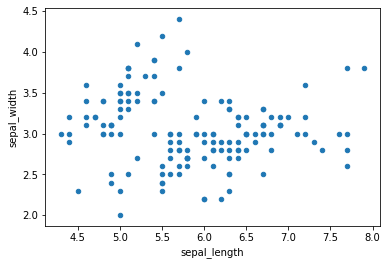

In [9]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.show()

* Sepal Length varies from 4 to 8
* Sepal width varies from 2 to 4.5
* However in above plot we can not distinguish as which point belongs to which species of Iris flower

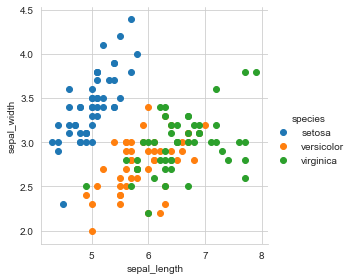

In [10]:
#Using seaborn library to do plotting
sns.set_style('whitegrid')
g = sns.FacetGrid(data=iris, hue='species', height=4) 
g = g.map(plt.scatter, 'sepal_length', 'sepal_width')
g = g.add_legend()
plt.show()

* setosa species Iris flowers are easily distinguishable based on sepal length and width
* versicolor and virginica are not easily distinguishable based on sepal length and width
* setosa flowers are linearly seperable from other two

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

<p>We have 4 features and we are going to visualize plots between any combnation of 2 features</p>

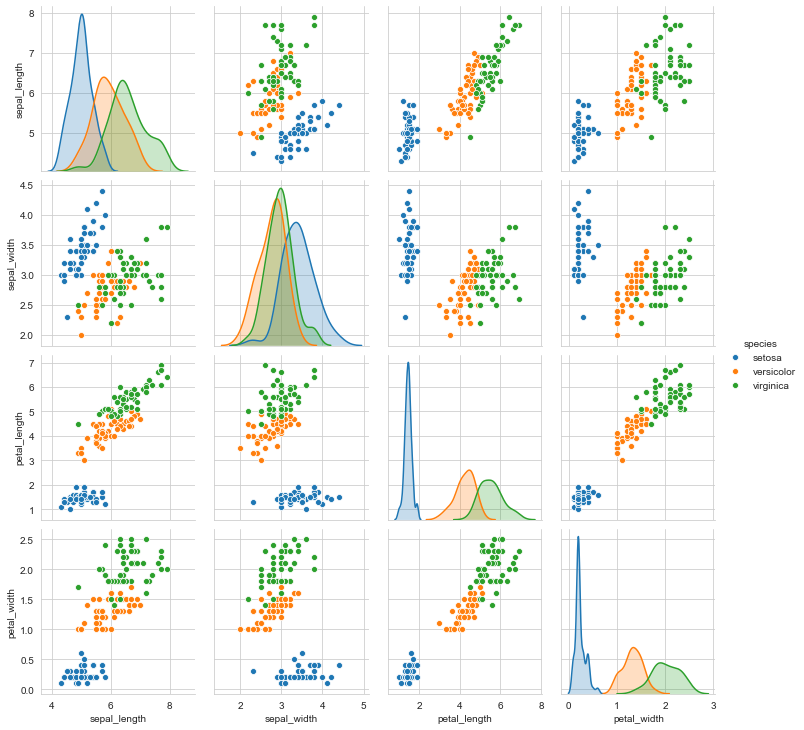

In [13]:
plt.close()

sns.set_style('whitegrid')
sns.pairplot(data=iris, hue='species')
plt.show()

Different combinations of features and how they separate flowers:
* sepal_length & sepal_width : does not separate flowers much
* sepal_length & petal_length : separates flowers properly 
* petal_length & petal_width : separates flowers the best amongst all pairs of features

<b> Lets Plot Petal Length and Petal Width explicitly</b>

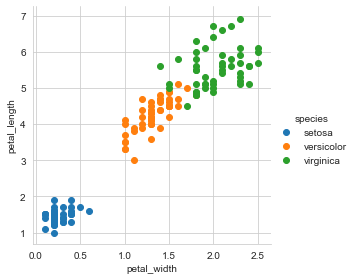

In [17]:
g = sns.FacetGrid(data=iris, hue='species', height=4)
g = g.map(plt.scatter, 'petal_width', 'petal_length')
g = g.add_legend()

plt.show()

* setosa is significantly separable from other two
* Infact we can say if a flower has petal_length <=2 and petal_wdth<=1 then it is setosa 
* versicolor and virginica are also seperable with a very slight overlap at boundary
* Flower having petal_length between 3 & 5 and petal_width between 1 and 2 is mostly versicolor
* Flower having petal_length 5 & above and petal_width 2 & above is virginica

<b> Limitations of Pair Plot</b>
<p>Pair Plot is a good visualization tool if number of features is small, say upto 5 or 6 features.
But as the number of features increase , it will have many plots to look at and that makes it difficult to check
that many no. of plots</p>

# (3.4) Histogram, PDF, CDF

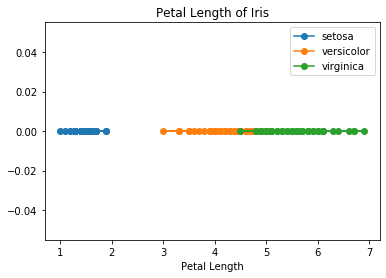

In [3]:
# What about 1-D scatter plot using just one feature?
# 1-D scatter plot of petal-length

iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), marker='o', label='setosa')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), marker='o', label='versicolor')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), marker='o', label='virginica')

plt.xlabel('Petal Length')
plt.title('Petal Length of Iris')
plt.legend()
plt.show()


<b>Disadvantages of 1-D scatter plot</b>: 
* Very hard to make sense as points are overlapping a lot.
* How many points are being overlapped we dont make out

Better way to visulaize a single feature is via Histogram, where X-axis represents value of features 

## Histogram of Petal_Length

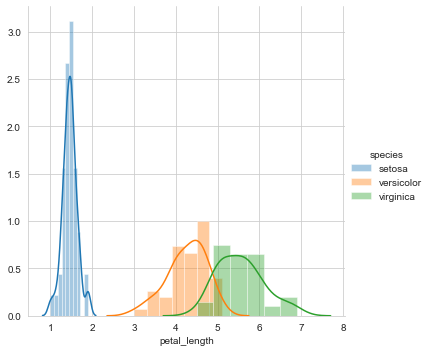

In [25]:
g = sns.FacetGrid(data=iris, hue='species', height=5)
g = g.map(sns.distplot, 'petal_length')
g = g.add_legend()

plt.show()

<p>In Histogram on X-axis we have a bin of values of a feature, and on Y-axis we have a count of data points which have values of that given feature in that respective bin</p>

* setosa flowers have petal_length mostly between 1 and 2
* virginica and versicolor have an overlap between 4 and 6

## Histogram of Petal_Width

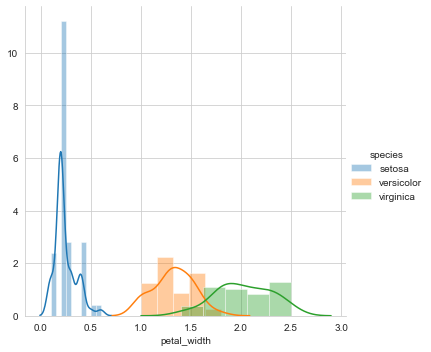

In [26]:
g = sns.FacetGrid(data=iris, hue='species', height=5)
g = g.map(sns.distplot, 'petal_width')
g = g.add_legend()

plt.show()

* Setosa and Versicolor have a small intersection
* Versicolor and Virginica have an overlap

<p>Petal_Width is slightly less preferable compared to Petal_Length as a feature to distinguish flowers</p>

## Histogram of Sepal_Length

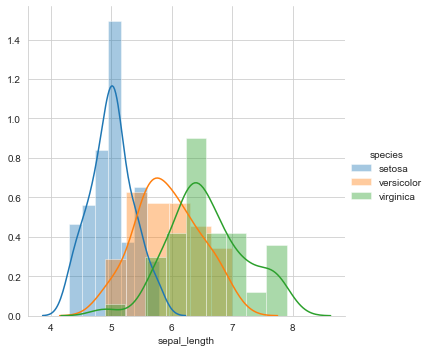

In [27]:
g = sns.FacetGrid(data=iris, hue='species', height=5)
g = g.map(sns.distplot, 'sepal_length')
g = g.add_legend()

plt.show()

A lot of overlap, so Sepal_Length  alone is not a good feature to separate flowers

## Histogram of Sepal_Width

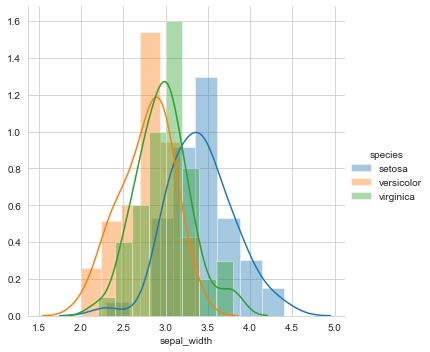

In [28]:
g = sns.FacetGrid(data=iris, hue='species', height=5)
g = g.map(sns.distplot, 'sepal_width')
g = g.add_legend()

plt.show()

<p> A lot of overlap, so Sepal_Width  alone is not a good feature to separate flowers </p>

In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


## Interpreting a PDF:

### Why is it called a density plot?

Density plot - Height represents how many points exist for each of the bins and in a way it tells how dense are data points in each bin

### Why is it called a probability plot?

Out of given datapoints in a dataset what is the probaility of datapoints falling in a certain bin

### for each value of petal_length, what does the value on y-axis mean?

for a given value of petal length, value on y-axis indicates the count of data points which have that given petal length

## Cumulative Distribution Function (CDF)

<p> With help of CDF we can answer questions like what percentage of versicolor flowers have a 
petal_length of less than 5? </p>

<h3> How to construct a CDF?</h3>

Lets say we have to build a CDF for petal_length of versicolor flowers.<br>
Logic is - for a given value of petal_length of a versicolor flower, find how many versicolor flowers have petal length
less that that given value, say count is n , calculate n / N , where N is total no. of versicolor flowers .
<br><br>
Another way is to calculate pdf and find the cumulative sum of pdf that would give cdf

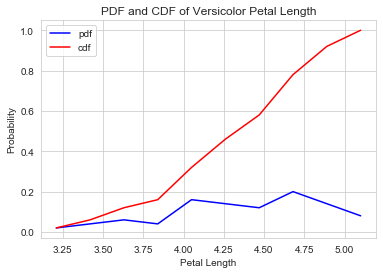

In [69]:
# Construct PDF & CDF for petal length of versicolor
iris_versicolor = iris.loc[iris['species'] == 'versicolor']
hist, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, density=True)

pdf = hist/sum(hist)
cdf = np.cumsum(pdf)

# plot
plt.plot(bin_edges[1:], pdf, color='b', label='pdf')
plt.plot(bin_edges[1:], cdf, color='r', label='cdf')
plt.title('PDF and CDF of Versicolor Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Probability')
plt.legend()
plt.show()

<h3> How to read a CDF? </h3>

<p>Integration of PDF is CDF</p>
<br>
Value at Y-axis tell what percentage of flowers have a value less than or equl to corresponding value at X-axis.
For example in above CDF plot , it indicates almost 95% of versicolor flowers have a petal length less than or equal to 5 .



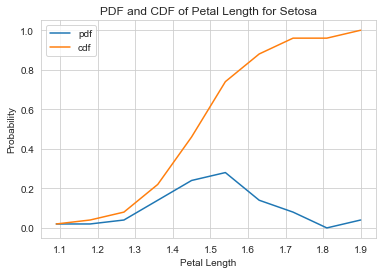

In [70]:
# Construct PDF & CDF for petal length of versicolor

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf');
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.title('PDF and CDF of Petal Length for Setosa')
plt.xlabel('Petal Length')
plt.ylabel('Probability')
plt.legend()
plt.show()

<h3> Impact of increasing bin size on PDF </h3>

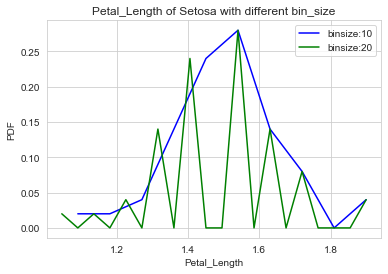

In [79]:
# binsize : 10
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf, c='b', label='binsize:10')


# binsize :20
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf, c='g', label='binsize:20')
    
plt.xlabel('Petal_Length')
plt.ylabel('PDF')
plt.title('Petal_Length of Setosa with different bin_size')

plt.legend()
plt.show()

<h3>Impact of increasing bin size on CDF </h3>

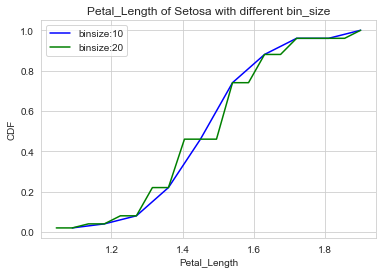

In [80]:
# binsize : 10
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf, c='b', label='binsize:10')


# binsize :20
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf, c='g', label='binsize:20')
    

plt.xlabel('Petal_Length')
plt.ylabel('CDF')
plt.title('Petal_Length of Setosa with different bin_size')


plt.legend()
plt.show()

<h3>Plots of CDF of petal_length for various types of flowers.</h3>

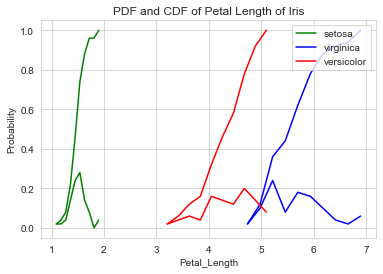

In [88]:
#setosa
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, c='g' , label='setosa')
plt.plot(bin_edges[1:], cdf, c='g')

#virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, c='b',label='virginica')
plt.plot(bin_edges[1:], cdf, c='b')

#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, c='r', label='versicolor')
plt.plot(bin_edges[1:], cdf, c='r')

plt.legend(loc='upper right')

plt.ylabel('Probability')
plt.xlabel('Petal_Length')
plt.title('PDF and CDF of Petal Length of Iris')
plt.show()


Based on above we can say -
* If Petal Length of Iris flower is <=2 then it is setosa
* If Petal Length of Iris flower is > 2 and <=5 then with 95% probability it is versicolor
* If Petal Length of iris flower is > 5 then with 90% probability it is virginica

# (3.5) Mean, Variance and Std-dev

In [10]:
avg,stddev =  np.mean(iris_setosa['petal_length']), np.std(iris_setosa['petal_length'])
print(f'Setosa Flowers: Petal Length\nMean: {avg}\nStd-deviation: {stddev}')

Setosa Flowers: Petal Length
Mean: 1.464
Std-deviation: 0.17176728442867112


In [12]:
avg,stddev =  np.mean(iris_virginica['petal_length']), np.std(iris_virginica['petal_length'])
print(f'Virginica Flowers: Petal Length\nMean: {avg}\nStd-deviation: {stddev}')

Virginica Flowers: Petal Length
Mean: 5.5520000000000005
Std-deviation: 0.546347874526844


In [13]:
avg,stddev = np.mean(iris_versicolor['petal_length']), np.std(iris_versicolor['petal_length'])
print(f'Versicolor Flowers: Petal Length\nMean: {avg}\nStd-deviation: {stddev}')

Versicolor Flowers: Petal Length
Mean: 4.26
Std-deviation: 0.4651881339845203


<u><b>Take away:</b></u>
* By just looking at mean Petal Length, we get to know that Setosa flowers tend to have small Petal Length
* Petal Length of Virginica and Versicolor is somewhat close
* It is easy to distinguish setosa flowers from the other two just be using petal_length
* Standard deviation i.e spread of setosa is less 0.17 , so most of setosa flowers have 
  an avg. petal length in range of 1.46 +/- 0.17 i.e in range of (1.29, 1.63)
* Std. dviation of Virginica and Versicolor ~.5 , so it means data points are spead in a bigger range around 
  their respective means  
* <b>Variance</b>: Variance is average of square distance of each point from the mean
* <b> Std-dev</b>: Standard deviation is square root of variance. It tells what is avg. deviation of points about mean

# (3.6) Median, Percentile, Quantile, IQR, MAD

In [16]:
# Median

med_setosa=  np.median(iris_setosa['petal_length'])
med_virginica = np.median(iris_virginica['petal_length'])
med_versicolor = np.median(iris_versicolor['petal_length'])

print(f'Median Petal Length:')
print(f'Setosa: {med_setosa}')
print(f'Versicolor: {med_versicolor}')
print(f'Virginica: {med_virginica}')


Median Petal Length:
Setosa: 1.5
Versicolor: 4.35
Virginica: 5.55


In [43]:
# Percentile , Quantile (i.e. 25th, 50th 75th percentiles)
line = lambda x: '-' * 30
dash = line('-')

print('Setosa Petal Length')
for p in np.arange(25, 76, 25):
    v = np.percentile(iris_setosa['petal_length'], p)
    print(f'{p}th percentile : {v}')
print(dash)
print('Versicolor Petal Length')
for p in np.arange(25, 76, 25):
    v = np.percentile(iris_versicolor['petal_length'], p)
    print(f'{p}th percentile : {v}')

print(dash)
print('Virginica Petal Length')
for p in np.arange(25, 76, 25):
    v = np.percentile(iris_virginica['petal_length'], p)
    print(f'{p}th percentile : {v}')

Setosa Petal Length
25th percentile : 1.4
50th percentile : 1.5
75th percentile : 1.5750000000000002
------------------------------
Versicolor Petal Length
25th percentile : 4.0
50th percentile : 4.35
75th percentile : 4.6
------------------------------
Virginica Petal Length
25th percentile : 5.1
50th percentile : 5.55
75th percentile : 5.875000000000001


<h3>90th Percentile</h3>

In [45]:
p=90
setosa_90p = np.percentile(iris_setosa['petal_length'], p)
versicolor_90p = np.percentile(iris_versicolor['petal_length'], p)
virginica_90p = np.percentile(iris_virginica['petal_length'], p)

print(f'Petal Length: 90th Percentile')
print(dash)
print(f'Setosa: {setosa_90p}')
print(f'Versicolor: {versicolor_90p}')
print(f'Virginica: {virginica_90p}')

Petal Length: 90th Percentile
------------------------------
Setosa: 1.7
Versicolor: 4.8
Virginica: 6.3100000000000005


<h3>Median Absolute Deviation</h3>

Median Absolute Deviation (MAD) : is the median of absolute values of deviation of a observations from median

In [46]:
from statsmodels import robust

In [48]:
mad_setosa = robust.mad(iris_setosa['petal_length'])
mad_versicolor = robust.mad(iris_versicolor['petal_length'])
mad_virginica = robust.mad(iris_virginica['petal_length'])

print(f'Petal Length: Median Absolution Deviation')
print(dash)
print(f'Setosa: {mad_setosa}')
print(f'Versicolor: {mad_versicolor}')
print(f'Virginica: {mad_virginica}')

Petal Length: Median Absolution Deviation
------------------------------
Setosa: 0.14826022185056031
Versicolor: 0.5189107764769602
Virginica: 0.6671709983275211


<h3>Inter Quartile Range IQR </h3>

* Inter Quartile Range is differce between 75th and 25th percentile.
* In a way it tells what is the difference between 50% of middle datapoints

In [54]:
np.percentile(iris_setosa['petal_length'], 75) - np.percentile(iris_setosa['petal_length'], 25) 

0.17500000000000027

# (3.7) Box plot and Whiskers

Text(0.5, 1.0, 'BoxPlot of Petal_Length of Iris flowers')

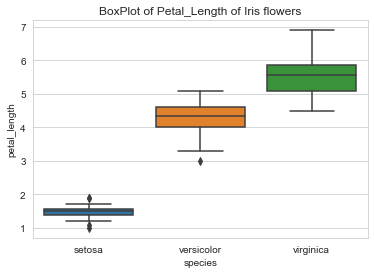

In [60]:
sns.set_style('whitegrid')
ax = sns.boxplot(x='species', y='petal_length', data=iris)

ax.set_title('BoxPlot of Petal_Length of Iris flowers')

* Line inside the Box of a Boxplot indicates 50th percentile
* Starting and ending lines of a boxplot indicate 25th and 75th percentile
* Area inside boxplot indicates where half of middle datapoints lie
* 1.5 * IQR is a whisker drawn on both sides of a box

<h3>Violin Plots</h3>

* combination of box plot and histogram

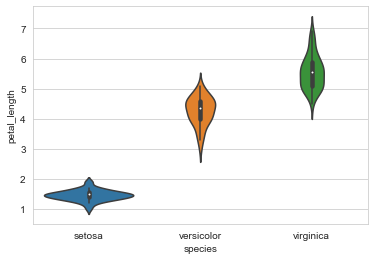

In [61]:
ax = sns.violinplot(x='species', y='petal_length', data=iris)


* In center we get a boxplot, with a white dot indicating 50th percentile
* Outer part indicates PDF

# (3.9) Summarizing plots in english
* Explain your findings/conclusions in plain english
* Never forget your objective (the probelm you are solving) . Perform all of your EDA aligned with your objectives.

# (3.10) Univariate, bivariate and multivariate analysis.

* Univariate Analysis : If we are doing analysis by taking one variable at a time
* Bivariate Analysis : If we are doing analysis taking two variables at a time
* Multivariate Analysis : More than 2 variables are taken for analysis

# (3.11) Multivariate probability density, contour plot.


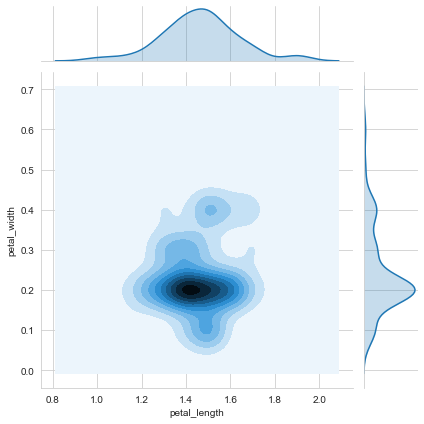

In [62]:
# 2D Density plot 
ax = sns.jointplot(x='petal_length', y='petal_width', data = iris_setosa, kind='kde')

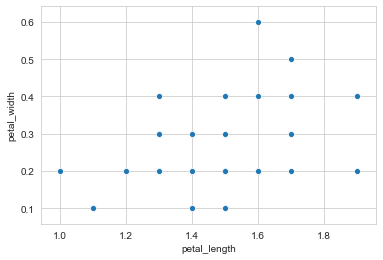

In [63]:
# Scatter plot between Petal_Length and Petal_Width for IRIS_Setosa
ax = sns.scatterplot(x='petal_length', y='petal_width', data=iris_setosa)

* We notice there are lot of points where petal_length is 1.4 and petal_width as 0.2, so we have darker area in Contour density plot